# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [151]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = os.path.join('data', 'Mouse_metadata.csv')
study_results_path = os.path.join('data', 'Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how='right', on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [152]:
# Checking the number of mice.
print(f"Total number of mice in study: {df['Mouse ID'].nunique()}")

Total number of mice in study: 249


In [153]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = df[df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Print the duplicate mice
print(duplicate_mice)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   

      Tumor Volume (mm3)  Metastatic Sites  
107            45.000000                 0  
137            45.000000                 0  
329            48.786801                 0  
360            4

In [154]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mouse = 'g989'
duplicated_mouse_id_data = df.loc[df['Mouse ID'] == duplicated_mouse]
print('All data for duplicated mouse ID:')
duplicated_mouse_id_data

All data for duplicated mouse ID:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [155]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'] != duplicated_mouse]
print(f'Clean DataFrame without duplicated mouse ID data (mouse {duplicated_mouse})')
clean_df.head()

Clean DataFrame without duplicated mouse ID data (mouse g989)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [156]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_df['Mouse ID'].nunique()
print(f'Number of mice after removing data with duplicates: {mouse_count}')

Number of mice after removing data with duplicates: 248


## Summary Statistics

In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Calculate mean
regimen_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# Calculate median
regimen_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

# Calculate variance
regimen_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

# Calculate standard deviation
regimen_std_dev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

# Calculate SEM
regimen_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(sem)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
regimen_summary = pd.DataFrame({'Tumor Vol Mean': regimen_mean,
                                'Tumor Vol Median': regimen_median,
                                'Tumor Vol Variance': regimen_variance,
                                'Tumor Vol Std Dev': regimen_std_dev,
                                'Tumor Vol SEM': regimen_sem})
regimen_summary
# regimen_mean

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Std Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [158]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Tumor_Vol_Mean='mean',
    Tumor_Vol_Median='median',
    Tumor_Vol_Variance='var',
    Tumor_Vol_Std_Dev='std',
    Tumor_Vol_SEM=lambda x: sem(x))
regimen_agg

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Variance,Tumor_Vol_Std_Dev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Number of Data Points per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Data Points'>

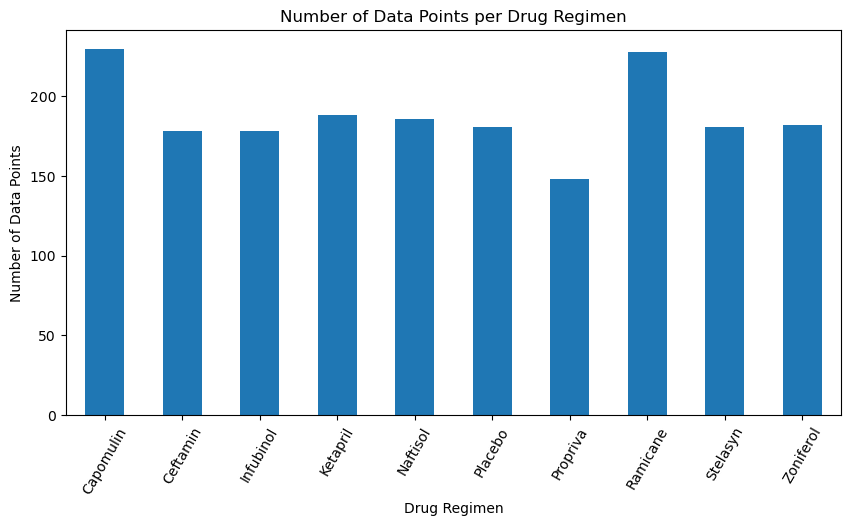

In [159]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_df = clean_df.groupby('Drug Regimen')['Mouse ID'].count()

regimen_df.plot(x=regimen_df.index, y=regimen_df, kind='bar', title='Number of Data Points per Drug Regimen', 
                xlabel='Drug Regimen', ylabel='Number of Data Points', figsize=(10, 5), rot=60)


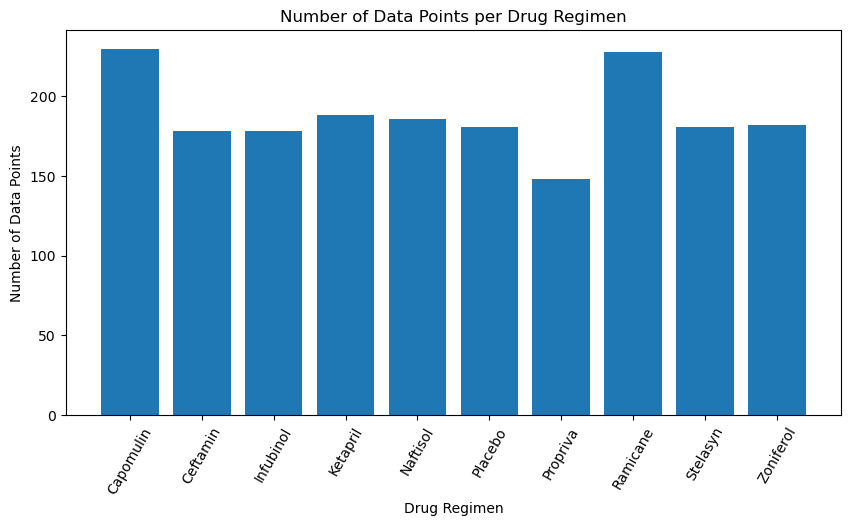

In [160]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 5))
plt.bar(regimen_df.index, regimen_df)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Drug Regimen')
plt.xticks(rotation=60)
plt.show()

<Axes: title={'center': 'Distribution of Unique Female vs. Male Mice'}>

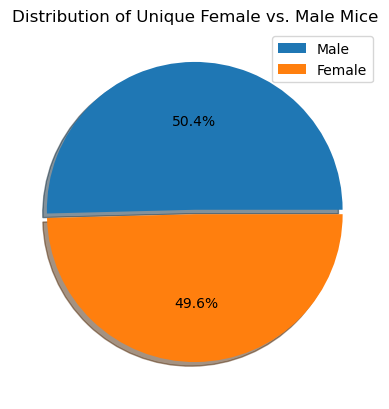

In [161]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their sex
mouse_sex_counts = clean_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()

# Make the pie chart
mouse_sex_counts.plot(kind='pie', 
                      title='Distribution of Unique Female vs. Male Mice', 
                      autopct='%1.1f%%', 
                      labels=None,
                      ylabel='', 
                      legend=True,
                      explode=(0.03, 0),
                      shadow=True)

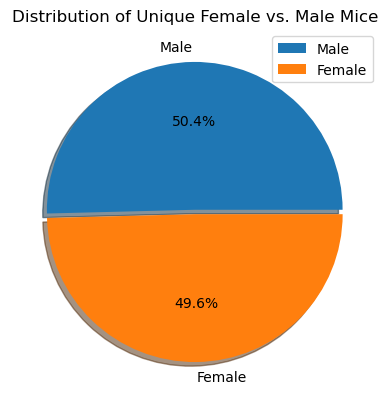

In [162]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# use mouse_sex_counts from above
plt.close()
# Make the pie chart
plt.pie(mouse_sex_counts, 
        labels=mouse_sex_counts.index, 
        autopct='%1.1f%%',
        explode=(0.03, 0),
        shadow=True)

plt.title('Distribution of Unique Female vs. Male Mice')
plt.legend(title='', loc='upper right')
plt.gca().set_yticklabels([])
plt.ylabel("")
plt.show()

## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_by_mouse = study_results.loc[study_results.groupby('Mouse ID')['Timepoint'].idxmax()]
last_timepoint_by_mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_with_regimen = pd.merge(last_timepoint_by_mouse, mouse_metadata, how='left', on='Mouse ID')
box_df = final_tumor_vol_with_regimen[['Tumor Volume (mm3)', 'Drug Regimen']]

In [164]:
# last_timepoint_by_drug = last_timepoint_by_mouse[['Drug Regimen', 'Tumor Volume (mm3)']]
# treatment_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# filtered_last_timepoint_by_drug = last_timepoint_by_drug[last_timepoint_by_drug['Drug Regimen'].isin(treatment_labels)]
# plt.figure(figsize=(10,6))
# filtered_last_timepoint_by_drug.boxplot(column='Tumor Volume (mm3)', 
#                                         by='Drug Regimen', 
#                                         grid=False,
#                                         flierprops=dict(marker='o', 
#                                                         color='white', 
#                                                         markersize=8, 
#                                                         linestyle='None'))
# plt.title('Tumor Volume by Drug Regimen')
# plt.suptitle('')
# plt.ylabel('Tumor Volume (mm3)')
# plt.xticks(rotation=60)
# plt.show()

In [165]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
# tumor_dict = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_labels:
    # print(drug)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data = box_df.loc[box_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)'].astype(float).tolist()
    
    # print(tumor_vol_data)
    
    # add subset
    tumor_volumes.append(tumor_vol_data)
    # print(tumor_volumes)
    # Determine outliers using upper and lower bounds

    # Convert to a Pandas Series
    tumor_vol_series = pd.Series(tumor_vol_data)
    
    # Determine quartiles
    quartiles = tumor_vol_series.quantile([0.25, 0.5, 0.75])
    # quartiles = tumor_vol_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_vol_series[(tumor_vol_series < lower_bound) | (tumor_vol_series > upper_bound)]
    print(f'Outliers for the {drug} regimen: {outliers}')
    
        # print(f'There are no outliers for the {drug} regimen.')

Outliers for the Capomulin regimen: Series([], dtype: float64)
Outliers for the Ramicane regimen: Series([], dtype: float64)
Outliers for the Infubinol regimen: 5    36.321346
dtype: float64
Outliers for the Ceftamin regimen: Series([], dtype: float64)


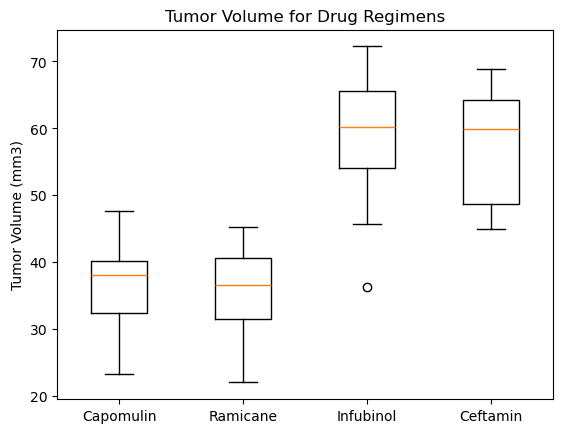

In [166]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_volumes, labels=treatment_labels)
plt.show()

## Line and Scatter Plots

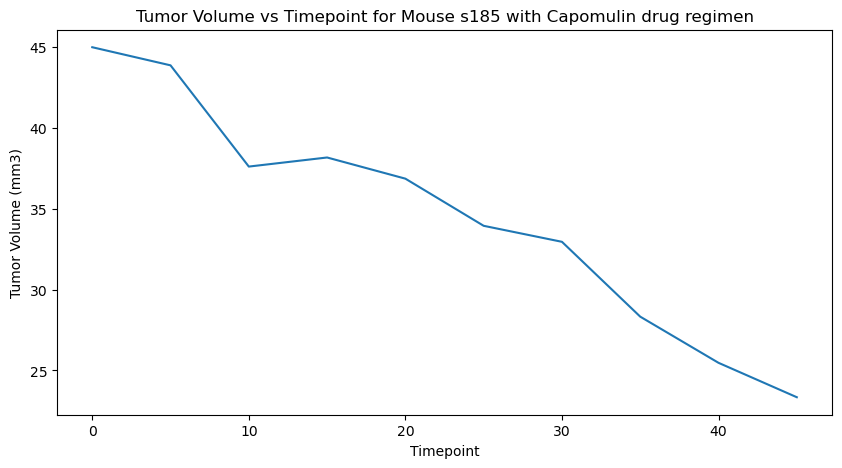

In [167]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Tumor Volume (mm3)', 'Timepoint']]
# randomly select a mouse
capomulin_mouse = capomulin.sample(n=1)['Mouse ID']  # ran and selected Mouse ID s185

# Data for Mouse s185
capomulin_mouse_data = capomulin.loc[capomulin['Mouse ID'] == 's185', 
                                     ['Tumor Volume (mm3)', 'Timepoint']]
capomulin_mouse_data.plot(x='Timepoint', 
                          y='Tumor Volume (mm3)', 
                          kind='line', 
                          figsize=(10, 5), 
                          title='Tumor Volume vs Timepoint for Mouse s185 with Capomulin drug regimen',
                          legend=False)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

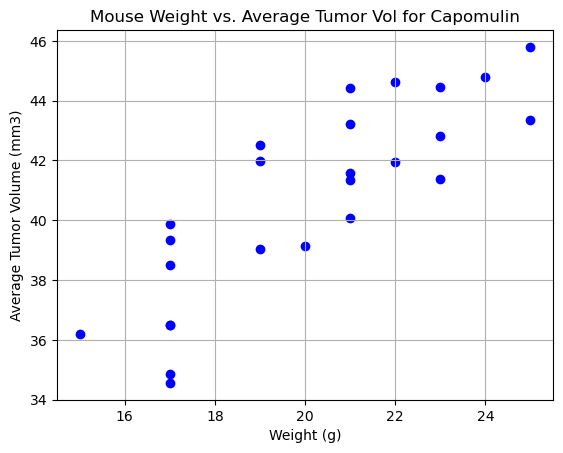

In [168]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# capomulin_vol = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)', 'Timepoint']]

capomulin = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse weight
average_tumor_volume = capomulin.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Create the scatter plot
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Vol for Capomulin')
plt.grid()
plt.show()

# capomulin_weight = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', ['Tumor Volume (mm3)', 'Weight (g)']]
# average_vol = capomulin_weight['Tumor Volume (mm3)'].mean()
# capomulin_weight.plot.scatter(x='Tumor Volume (mm3)', y='Weight (g)')
# average_vol
# capomulin_weight

## Correlation and Regression

Correlation coefficient: 0.5256995552077175
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723
Regression: y = 0.954x + 21.552


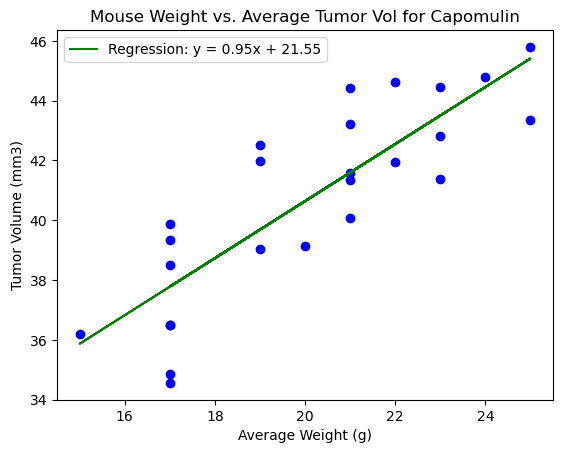

In [169]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = capomulin['Weight (g)'].corr(capomulin['Tumor Volume (mm3)'])
print(f'Correlation coefficient: {correlation}')

slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume['Weight (g)'], 
                                                            average_tumor_volume['Tumor Volume (mm3)'])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f'Regression: y = {slope:.3f}x + {intercept:.3f}')

regression_line = slope * average_tumor_volume['Weight (g)'] + intercept
slope = round(slope, 2)
intercept = round(intercept, 2)
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='blue')
plt.plot(average_tumor_volume['Weight (g)'], regression_line, 
         color='green', 
         label='Regression: y = ' + str(slope) + 'x + ' + str(intercept))
plt.title('Mouse Weight vs. Average Tumor Vol for Capomulin')
plt.xlabel('Average Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.show()